Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing dataset

In [ ]:
dataset = pd.read_excel('advertising_sales_data.xlsx')

Checking for missing values

In [ ]:
print(dataset.isnull().sum())

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


In [ ]:
print(dataset.shape)

(200, 5)


Dropping rows with missing data

In [ ]:
dataset = dataset.dropna()
print(dataset.isnull().sum())

Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Average amount spent on TV advertising

In [ ]:
 print('Average Expenditure:-')
 print(f"TV: {dataset['TV'].mean():.2f}")
 print(f"Radio: {dataset['Radio'].mean():.2f}")
 print(f"Newspaper: {dataset['Newspaper'].mean():.2f}")

Average Expenditure:-
TV: 146.79
Radio: 23.26
Newspaper: 30.69


Making correlation matrix

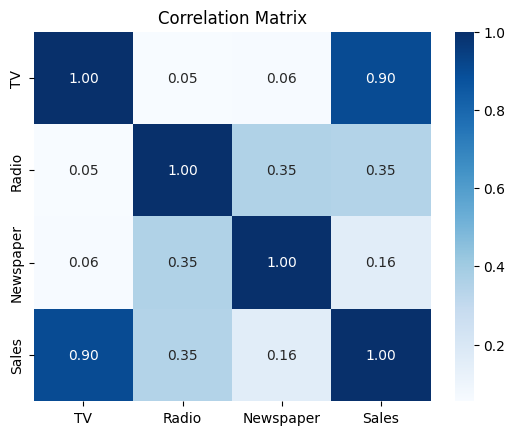

In [ ]:
import seaborn as sns
selected_dataset = dataset.iloc[:,1:]
cm = selected_dataset.corr()
sns.heatmap(cm, annot = True, cmap='Blues', fmt = '0.2f')
plt.title('Correlation Matrix')
plt.show()

Training a multiple linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = dataset.iloc[:,1:4].values
y = dataset.iloc[:,4].values

Dividing the dataset into training and testing sets

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

Training the model on the training set

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Finding the values of the intercept and coefficients in the multiple linear regression equation

In [ ]:
c = lr.intercept_
coeffs = lr.coef_
print(f'Intercept(c) =  {c}\nCoefficients = {coeffs}')

Intercept(c) =  4.514221802421719
Coefficients = [ 0.05642276  0.10885805 -0.00445499]


Visualising training set results

In [ ]:
y_pred_train = lr.predict(x_train)

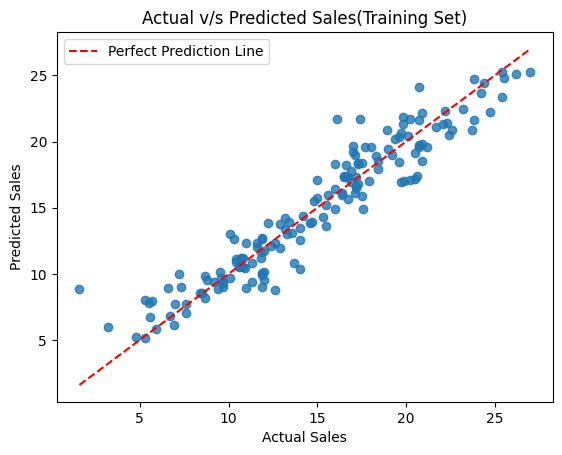

In [ ]:
plt.scatter(y_train,y_pred_train, alpha=0.8)
plt.plot([y.min(),y.max()],[y.min(),y.max()], color='red', linestyle = '--', label = 'Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual v/s Predicted Sales(Training Set)')
plt.legend()
plt.show()

Visualising testing set results

In [ ]:
y_pred_test = lr.predict(x_test)

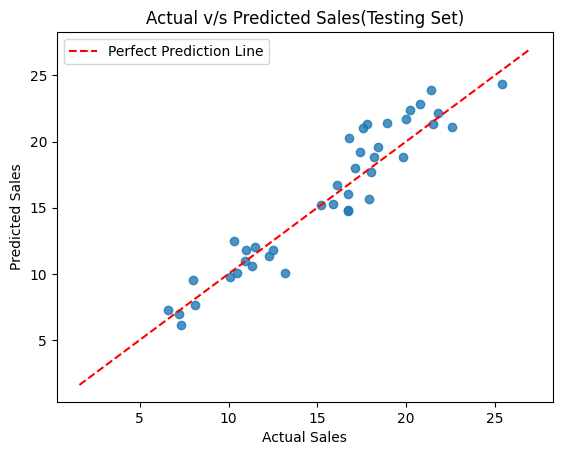

In [ ]:
plt.scatter(y_test,y_pred_test, alpha = 0.8)
plt.plot([y.min(),y.max()],[y.min(),y.max()], color='red', linestyle = '--', label = 'Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual v/s Predicted Sales(Testing Set)')
plt.legend()
plt.show()

Predicted sales for a new input expenditure

In [ ]:
y_pred = lr.predict([[200,40,50]])
print(y_pred)

[19.93034664]


Training the model with normalised data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
lr_scaled = LinearRegression()
lr_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("---Without Normalisation---\n")
print(f"R² Score: {r2_score(y_test,y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_test):.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print(f"Coefficients: {lr.coef_}\n\n")
print("---With Normalisation---\n")
print(f"R² Score: {r2_score(y_test,y_pred_scaled):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_scaled):.4f}")
print(f"Intercept: {lr_scaled.intercept_:.4f}")
print(f"Coefficients: {lr_scaled.coef_}")


---Without Normalisation---

R² Score: 0.8830
MSE: 2.6808
Intercept: 4.5142
Coefficients: [ 0.05642276  0.10885805 -0.00445499]


---With Normalisation---

R² Score: 0.8830
MSE: 2.6808
Intercept: 15.0329
Coefficients: [ 4.80894702  1.65120604 -0.09721829]


Training the model only using radio and newspaper advertising expenditures

In [ ]:
x_new = dataset.iloc[:,2:4].values
x_train_new,x_test_new,y_train,y_test=train_test_split(x_new,y, test_size=0.2, random_state=1)
lr_new = LinearRegression()
lr_new.fit(x_train_new,y_train)
y_pred_new = lr_new.predict(x_test_new)

Visualising the predictions of the new model

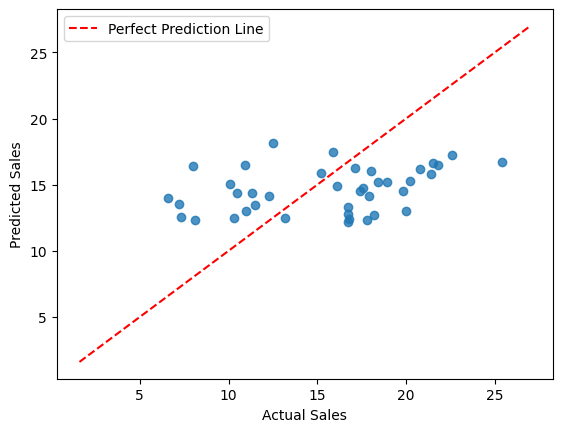

In [ ]:
plt.scatter(y_test,y_pred_new, alpha = 0.8)
plt.plot([y.min(),y.max()], [y.min(),y.max()], color = 'red', linestyle = '--',label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()